### Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.cluster import KMeans

### Dataset

In [2]:
pinguin_df=pd.read_csv(r"D:\Projects\Unsupervied learning\penguins.csv")

### EDA

In [3]:
pinguin_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [4]:
pinguin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


#### Our dataset has no missing values

In [5]:
pinguin_df.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

#### Here we see that variables have different scale and that may affact our machine learning model and its assumptions

In [6]:
pinguin_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,332.000000,332.000000,332.000000,332.000000
mean,44.021084,17.153012,200.975904,4206.475904
std,5.452462,1.960275,14.035971,806.361278
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.700000,17.300000,197.000000,4025.000000
75%,48.625000,18.700000,213.000000,4781.250000
max,59.600000,21.500000,231.000000,6300.000000


### Preprocessing 

#### Converting categorical variable into numeric one using One hot encoding

In [7]:
pinguin_df["sex"].shape

(332,)

In [8]:
X=pinguin_df["sex"].values

In [9]:
type(X) 

numpy.ndarray

In [10]:
X=X.reshape(-1,1)

In [11]:
ohe=OneHotEncoder(handle_unknown="ignore",sparse_output=False).set_output(transform="pandas")

In [12]:
ohe_transformed=ohe.fit_transform(X)

In [13]:
ohe_transformed.head()

,x0_FEMALE,x0_MALE
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0


In [14]:
pinguin_df=pd.concat([pinguin_df,ohe_transformed],axis=1)

In [15]:
pinguin_df.drop(["sex"],axis=1,inplace=True)

In [16]:
pinguin_df=pinguin_df.rename(columns={"x0_FEMALE":"Female","x0_MALE":"Male"})

In [17]:
pinguin_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,Female,Male
0,39.1,18.7,181.0,3750.0,0.0,1.0
1,39.5,17.4,186.0,3800.0,1.0,0.0
2,40.3,18.0,195.0,3250.0,1.0,0.0
3,36.7,19.3,193.0,3450.0,1.0,0.0
4,39.3,20.6,190.0,3650.0,0.0,1.0


In [18]:
scalar=StandardScaler()

In [19]:
scaled_data=scalar.fit_transform(pinguin_df)

In [20]:
scaled_pinguin_df = pd.DataFrame(scaled_data,columns=pinguin_df.columns)

In [21]:
scaled_pinguin_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,Female,Male
count,3.320000e+02,3.320000e+02,3.320000e+02,3.320000e+02,3.320000e+02,3.320000e+02
mean,-4.708416e-16,1.284113e-16,7.276642e-16,4.280378e-17,1.391123e-16,-1.391123e-16
std,1.001509e+00,1.001509e+00,1.001509e+00,1.001509e+00,1.001509e+00,1.001509e+00
min,-2.189667e+00,-2.070694e+00,-2.067519e+00,-1.871059e+00,-9.939939e-01,-1.006042e+00
25%,-8.304338e-01,-7.934376e-01,-7.831643e-01,-8.153502e-01,-9.939939e-01,-1.006042e+00
50%,1.247034e-01,7.509650e-02,-2.836929e-01,-2.253950e-01,-9.939939e-01,9.939939e-01
75%,8.456482e-01,7.903599e-01,8.579560e-01,7.138756e-01,1.006042e+00,9.939939e-01
max,2.861539e+00,2.220887e+00,2.142311e+00,2.600180e+00,1.006042e+00,9.939939e-01


### Now, lets consider what's the suitable number of cluster

In [22]:
clusters=[1,2,3,4,5,6]
interia_value=[]

In [23]:
for cluster in clusters:
    model=KMeans(n_clusters=cluster,n_init="auto",random_state=11)
    model.fit(scaled_pinguin_df)
    interia_value.append(model.inertia_)

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Wi

In [24]:
interia_value

[1991.9999999999998,
 1159.963550661906,
 695.1978095474079,
 383.46432033536433,
 311.78330188454345,
 295.9693060945854]

### Elbow_method

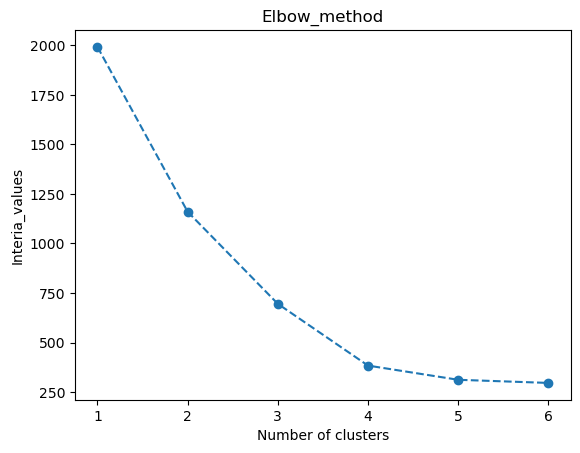

In [25]:
plt.scatter(clusters,interia_value)
plt.plot(clusters,interia_value,linestyle="--")
plt.title("Elbow_method")
plt.xlabel("Number of clusters")
plt.ylabel("Interia_values")
plt.show()

In [26]:
n_clusters=4

### Initiating model with the optimal number of clusters

In [27]:
k_mean_model=KMeans(n_clusters=4)

In [28]:
k_mean_model.fit(scaled_pinguin_df)

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=4)

In [36]:
pinguin_clusters=k_mean_model.predict(scaled_pinguin_df)

In [38]:
X_p=scaled_pinguin_df.iloc[:,0]
Y_p=scaled_pinguin_df.iloc[:,1]

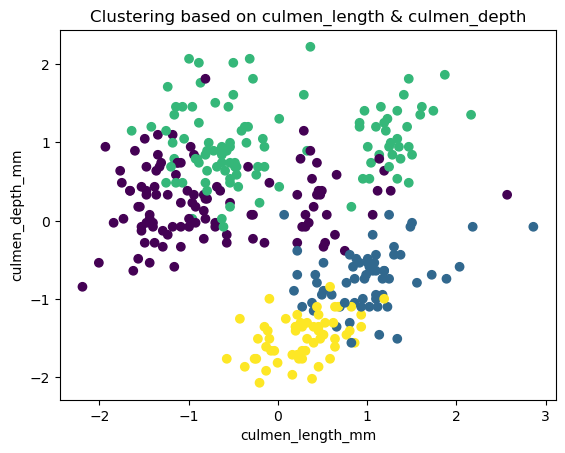

In [39]:
plt.scatter(X_p,Y_p,c=pinguin_clusters)
plt.xlabel("culmen_length_mm")
plt.ylabel("culmen_depth_mm")
plt.title("Clustering based on culmen_length & culmen_depth")
plt.show()

### Extracting numeric insights (mean of each cluster)

In [40]:
pinguin_df["cluster"]=pinguin_clusters

In [41]:
stat_penguins=pinguin_df.groupby("cluster")[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','body_mass_g']].mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
cluster,,,,
0,40.217757,17.611215,189.046729,3419.158879
1,49.473770,15.718033,221.540984,5484.836066
2,43.878302,19.111321,194.764151,4006.603774
3,45.563793,14.237931,212.706897,4679.741379
